<a href="https://colab.research.google.com/github/henriquebap/Machine_Learning_HB/blob/main/GYMBUDDY-IA/MLV1_GYMBUDDY_CL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducao ao Modelo de Recomendação de Treino e Dieta
Neste projeto, desenvolvemos um modelo de Machine Learning para um aplicativo de academia que recomenda treinos e dietas personalizados com base nas informações dos usuários. A seguir, apresentamos o passo a passo detalhado do desenvolvimento e implementação do modelo.

---
## 1. Coleta e Pré-processamento dos Dados
- Coleta dos Dados:
  - Esta Primeira versao do modelo esta usando dados gerados por inteligencias artificiais [ChatGPT](https://chatgpt.com/?oai-dm=1) [Gemini](https://gemini.google.com/app) e [Copilot](https://copilot.microsoft.com/)
  - Contem Informacoes sobre Nome, Idade, Sexo, Altura, Ativa ou nao na academia, Peso, Tipo de Corpo, Condicao de Deficiencia
  - Calculamos o IMC e geramos se esta em um condicao sobrepeso ou nao.
- Pré-processamento dos Dados:
  - Limpeza e tratamento de valores ausentes
  - Transformação de variáveis categóricas, como tipo de corpo, usando codificação numérica.
  - Normalização de variáveis numéricas, como altura, peso e IMC, para garantir que todas as características tenham a mesma escala.
---
## 2. Engenharia de Recursos e Criação do Alvo
- Criação do Alvo:
  - Definição de objetivos de treino com base no IMC e na condição de deficiência dos usuários:
    - Treino de Força para IMC entre 18,5 e 24,9.
    - Treino de Perda de Peso para usuários com sobrepeso.
    - Treino Especial para Deficientes para usuários com condição de deficiência.
    - Treino Ganho de Massa para pessoas com o IMC abaixo de 18,5
- Engenharia de Recursos:
  - Criação de novos recursos derivados, como índice de massa corporal (IMC) e classificação de sobrepeso.
---
## 3. Modelagem de Machine Learning
- Seleção de Algoritmo:
  - Foram treinamos 3 algoritmos de Machine Learning e 1 Rede Neural Artificial
    - RandomForestClassifier
    - DecisionTreeClassifier
    - SVC (Support Vector Machines)
  - Rede Neural
    - Keras
- Treinamento do Modelo:
  - Divisão dos dados em conjuntos de treinamento e teste.
  - Treinamento do modelo usando o conjunto de treinamento para prever os objetivos de treino dos usuários.
- Avaliação do Modelo:
  - Avaliação da precisão do modelo usando métricas como acurácia, precisão, recall e F1-score.
---
## 4. Implementação do Modelo
- Previsão de Novos Dados:
  - Utilização do modelo treinado para prever os objetivos de treino de novos dados.
### Integração com o ChatGPT:
  - Para integrar o modelo com a API do ChatGPT da OpenAI, é necessário utilizar a chave da API fornecida pelo OpenAI. A chave da API é essencial para autenticar suas solicitações à API e obter respostas do modelo.
  - Geração de mensagens de recomendação de treino e dieta com base nas previsões do modelo.
  - Envio das mensagens para a API do ChatGPT para interação com os usuários finais.
### Chave da **API** do OpenAI:
- Para utilizar a API do OpenAI, você precisará de uma chave de API válida. Você pode obter sua chave da API ao se inscrever no OpenAI e criar um projeto de integração na plataforma. Para mais informações, visite o site do OpenAI em [OpenAI Platform.](https://openai.com/)
  
---
## 5. Considerações Finais e Próximos Passos
- Considerações Finais:
  - Analisar e Refletir sobre possiveis melhorias e limitacoes encontradas no modelo durante o desenvolvimento
- Próximos Passos:
  - Expansão do modelo para incluir mais variáveis e dados.
  - Desenvolver a API com o GPT e os inputs e outputs
  - Desenvolver o alvo e os seus parametros para a classificacao
  - Melhoria da interface do usuário e da experiência do usuário final.
---
## Contato
LinkedIn: [Henrique Baptista](https://www.linkedin.com/in/henrique-baptista777/)

GitHub: [henriquebap](https://github.com/henriquebap)

Email: henriquebaptista2003@gmail.com

**Para mais informações ou para entrar em contato, sinta-se à vontade para usar os links acima.**

# Imports

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import requests
import json
import time

# Dataset Coleta de dados

In [2]:
dataframe = pd.read_csv("/content/datagpt2.csv")

In [3]:
dataframe.head()

,Nome,Idade,Sexo,Treina,Altura,Peso,Tipo de Corpo,Deficiente
0,Maria,28,F,True,1.65,55,Mesomorfo,False
1,João,35,M,True,1.80,85,Endomorfo,False
2,Ana,22,F,True,1.70,60,Ectomorfo,True
3,Pedro,30,M,False,1.75,70,Mesomorfo,False
4,Carolina,40,F,True,1.60,70,Endomorfo,False


In [4]:
dataframe.tail()

,Nome,Idade,Sexo,Treina,Altura,Peso,Tipo de Corpo,Deficiente
379,Otávio,42,M,True,1.81,79,Mesomorfo,False
380,Paula,21,F,True,1.66,58,Ectomorfo,False
381,Ricardo,36,M,False,1.79,76,Endomorfo,True
382,Sofia,24,F,True,1.70,62,Mesomorfo,False
383,Tiago,29,M,True,1.83,81,Endomorfo,False


In [5]:
dataframe.shape

(384, 8)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nome           384 non-null    object 
 1   Idade          384 non-null    int64  
 2   Sexo           384 non-null    object 
 3   Treina         384 non-null    bool   
 4   Altura         384 non-null    float64
 5   Peso           384 non-null    int64  
 6   Tipo de Corpo  384 non-null    object 
 7   Deficiente     384 non-null    bool   
dtypes: bool(2), float64(1), int64(2), object(3)
memory usage: 18.9+ KB


In [7]:
dataframe.columns.values

array(['Nome', 'Idade', 'Sexo', 'Treina', 'Altura', 'Peso',
       'Tipo de Corpo', 'Deficiente'], dtype=object)

In [8]:
dataframe.dtypes

Nome              object
Idade              int64
Sexo              object
Treina              bool
Altura           float64
Peso               int64
Tipo de Corpo     object
Deficiente          bool
dtype: object

In [9]:
dataframe.isnull().sum()

Nome             0
Idade            0
Sexo             0
Treina           0
Altura           0
Peso             0
Tipo de Corpo    0
Deficiente       0
dtype: int64

# Engenharia de Recurso
## Criando Variavel IMC e Sobrepeso de acordo com os dados Peso e Altura
Fonte [Tabela IMC](https://www.programasaudefacil.com.br/calculadora-de-imc)

In [11]:
dataframe['imc'] = dataframe['Peso'] / (dataframe['Altura'] ** 2)

dataframe['sobrepeso'] = dataframe['imc'] > 30
dataframe['sobrepeso'] = dataframe['sobrepeso']

In [12]:
dataframe.head()

,Nome,Idade,Sexo,Treina,Altura,Peso,Tipo de Corpo,Deficiente,imc,sobrepeso
0,Maria,28,F,True,1.65,55,Mesomorfo,False,20.202020,False
1,João,35,M,True,1.80,85,Endomorfo,False,26.234568,False
2,Ana,22,F,True,1.70,60,Ectomorfo,True,20.761246,False
3,Pedro,30,M,False,1.75,70,Mesomorfo,False,22.857143,False
4,Carolina,40,F,True,1.60,70,Endomorfo,False,27.343750,False


# Analise dos Dados

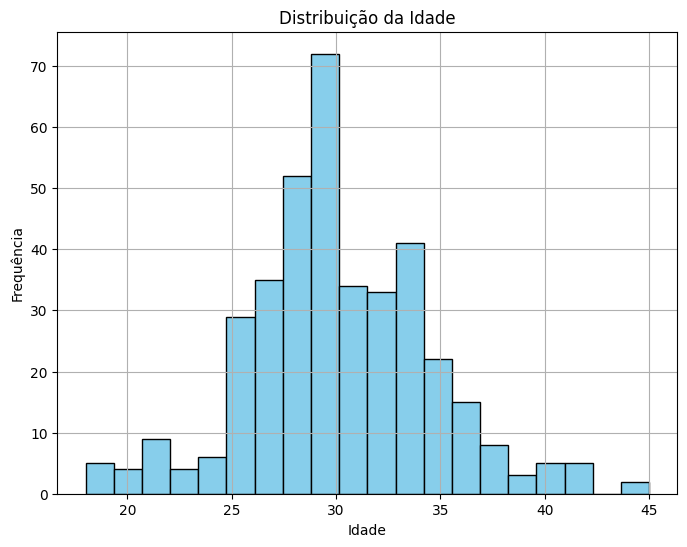

In [13]:
# Histograma da idade
plt.figure(figsize=(8, 6))
plt.hist(dataframe['Idade'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


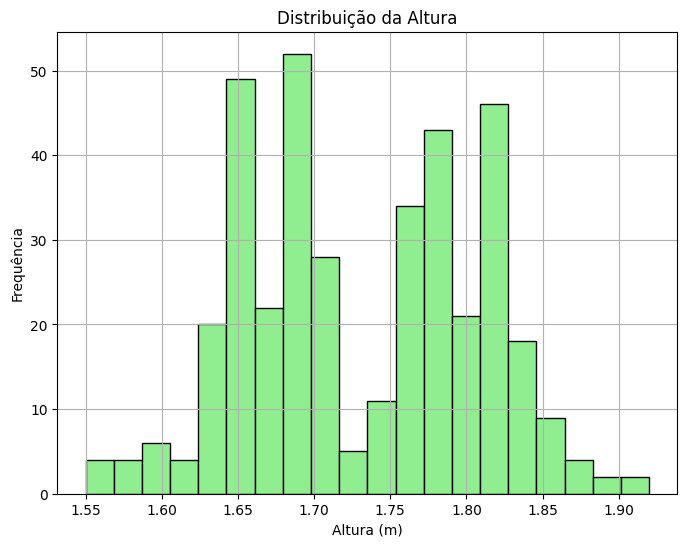

In [14]:
# Histograma da altura
plt.figure(figsize=(8, 6))
plt.hist(dataframe['Altura'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribuição da Altura')
plt.xlabel('Altura (m)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

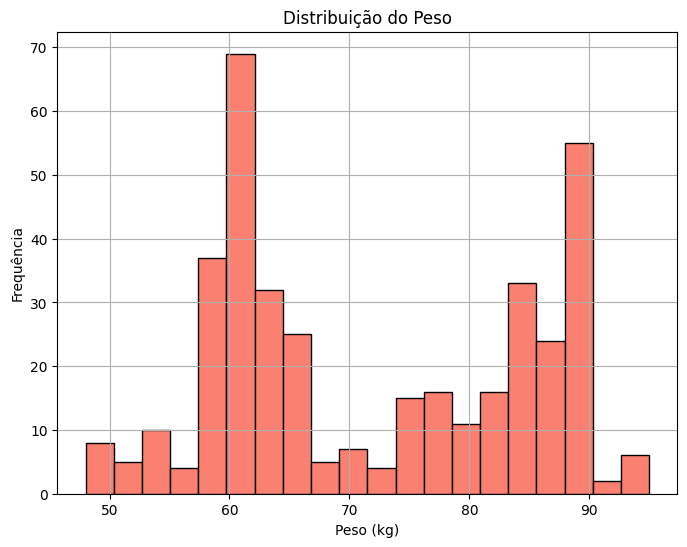

In [15]:
# Histograma do peso
plt.figure(figsize=(8, 6))
plt.hist(dataframe['Peso'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribuição do Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

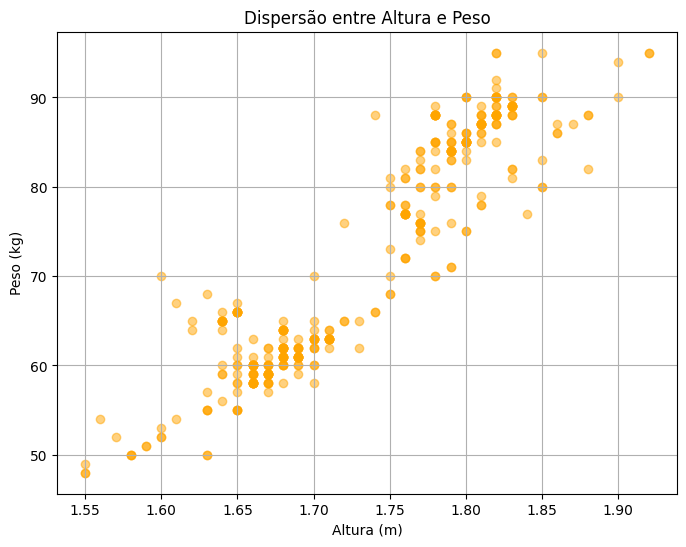

In [16]:
# Gráfico de dispersão entre altura e peso
plt.figure(figsize=(8, 6))
plt.scatter(dataframe['Altura'], dataframe['Peso'], color='orange', alpha=0.5)
plt.title('Dispersão entre Altura e Peso')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.show()

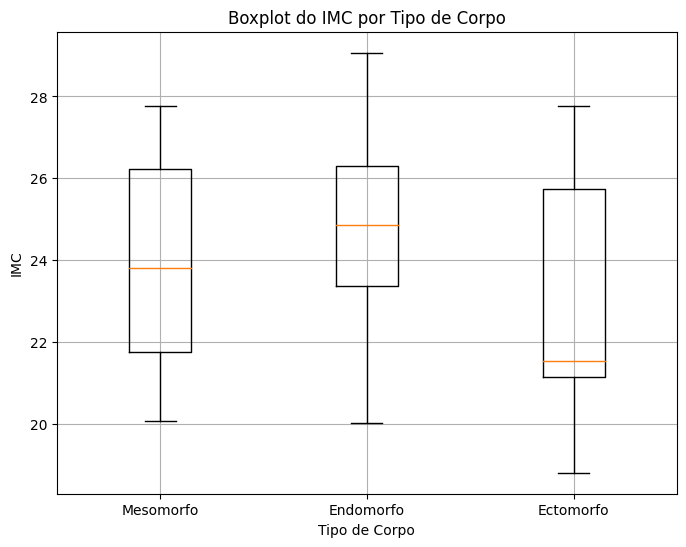

In [17]:
# Boxplot do IMC por tipo de corpo
plt.figure(figsize=(8, 6))
plt.boxplot([dataframe[dataframe['Tipo de Corpo'] == 'Mesomorfo']['imc'],
             dataframe[dataframe['Tipo de Corpo'] == 'Endomorfo']['imc'],
             dataframe[dataframe['Tipo de Corpo'] == 'Ectomorfo']['imc']],
            labels=['Mesomorfo', 'Endomorfo', 'Ectomorfo'])
plt.title('Boxplot do IMC por Tipo de Corpo')
plt.xlabel('Tipo de Corpo')
plt.ylabel('IMC')
plt.grid(True)
plt.show()

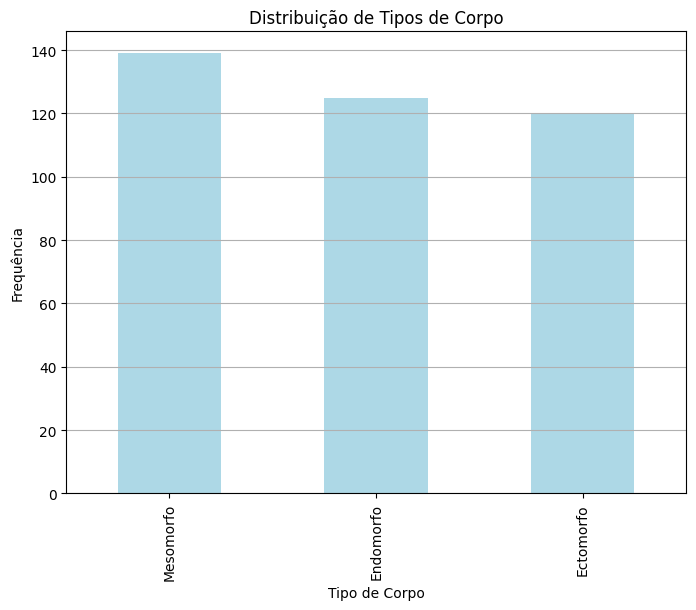

In [18]:
# Gráfico de barras da distribuição de tipos de corpo
plt.figure(figsize=(8, 6))
dataframe['Tipo de Corpo'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribuição de Tipos de Corpo')
plt.xlabel('Tipo de Corpo')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

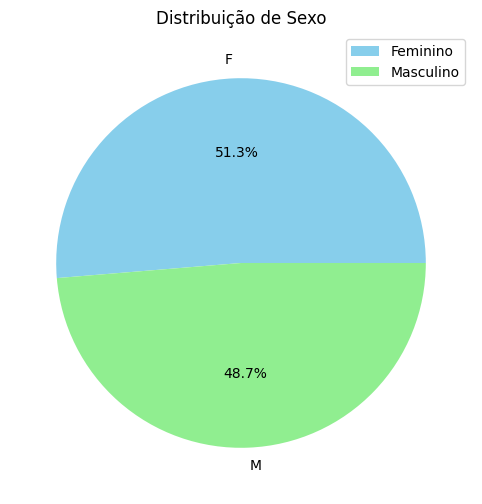

In [19]:
# Gráfico de pizza da distribuição de sexo
plt.figure(figsize=(8, 6))
dataframe['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribuição de Sexo')
plt.ylabel('')
plt.legend(['Feminino', 'Masculino'], loc='best')
plt.show()

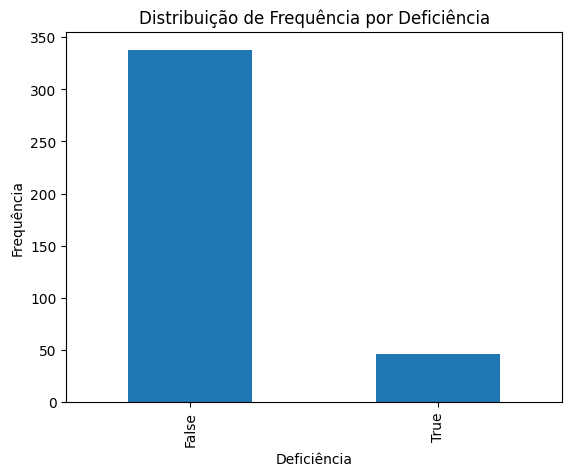

In [20]:
dataframe['Deficiente'].value_counts().plot(kind='bar')
plt.title('Distribuição de Frequência por Deficiência')
plt.xlabel('Deficiência')
plt.ylabel('Frequência')
plt.show()

<ipython-input-21-aa43f366e1d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataframe['Nome'], y=dataframe['imc'], palette='viridis')


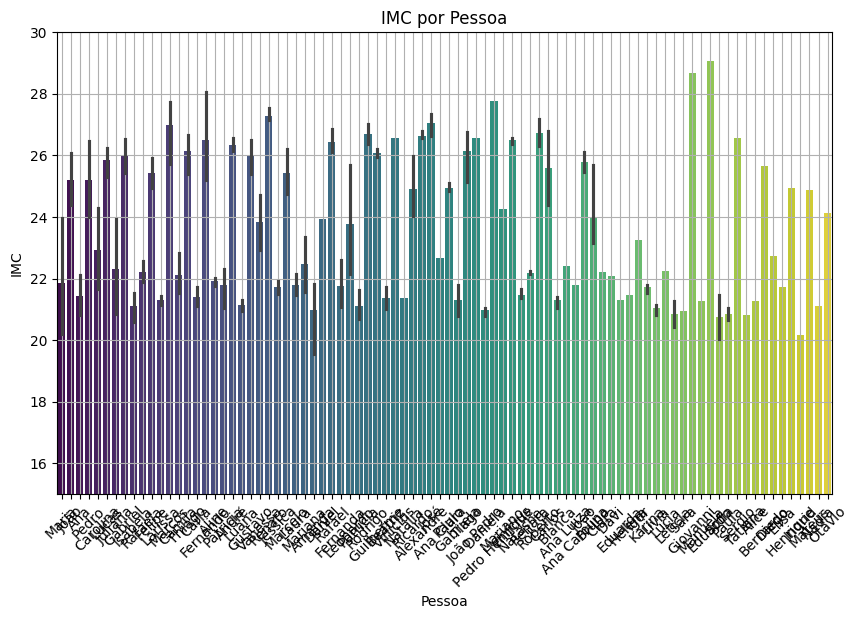

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dataframe['Nome'], y=dataframe['imc'], palette='viridis')
plt.title('IMC por Pessoa')
plt.xlabel('Pessoa')
plt.ylabel('IMC')
plt.ylim(15, 30)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

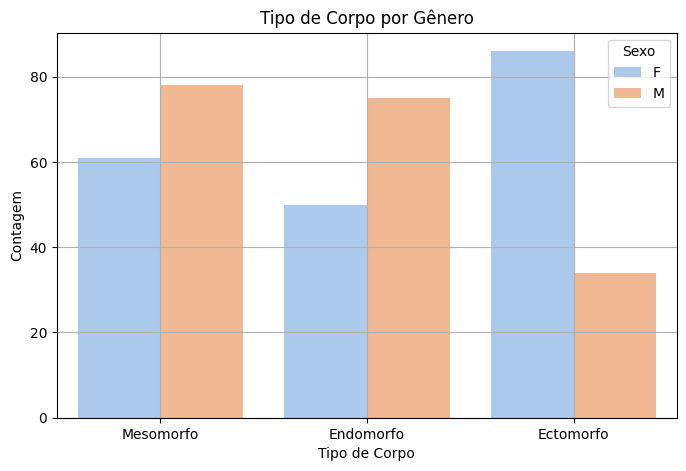

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x=dataframe['Tipo de Corpo'], hue=dataframe['Sexo'], palette='pastel')
plt.title('Tipo de Corpo por Gênero')
plt.xlabel('Tipo de Corpo')
plt.ylabel('Contagem')
plt.grid(True)
plt.legend(title='Sexo', loc='upper right')
plt.show()

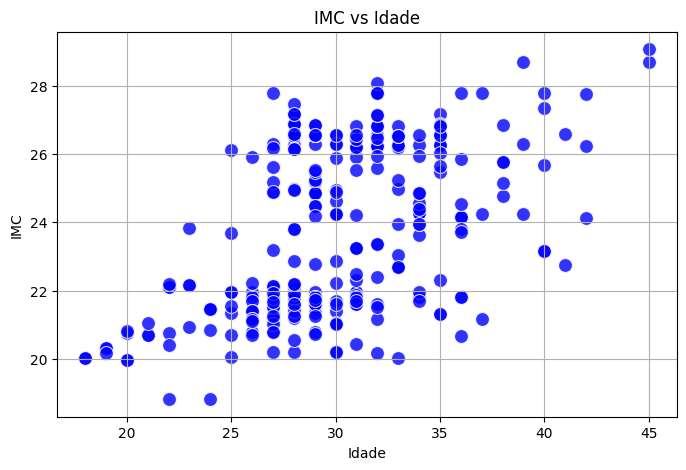

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dataframe['Idade'], y=dataframe['imc'], s=100, color='blue', alpha=0.8)
plt.title('IMC vs Idade')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.grid(True)
plt.show()

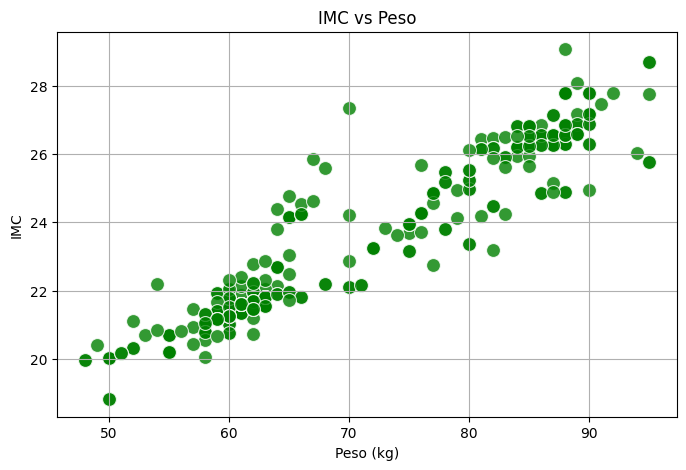

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dataframe['Peso'], y=dataframe['imc'], s=100, color='green', alpha=0.8)
plt.title('IMC vs Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('IMC')
plt.grid(True)
plt.show()

In [25]:
# Gráfico de dispersão interativo com zoom e seleção de dados
fig = px.scatter(dataframe, x='Sexo', y='imc', color='Tipo de Corpo', size='Idade', hover_name='Nome', title='Comparação de IMC por Sexo')
fig.show()

<ipython-input-26-edae9ef5a74e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




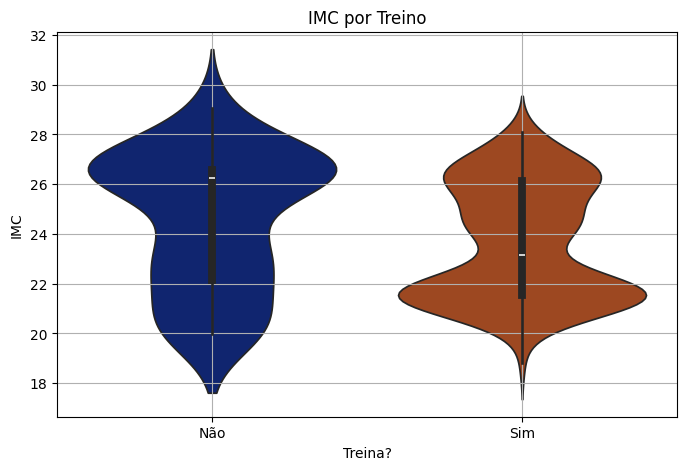

In [26]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=dataframe['Treina'], y=dataframe['imc'], palette='dark')
plt.title('IMC por Treino')
plt.xlabel('Treina?')
plt.ylabel('IMC')
plt.grid(True)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

<ipython-input-27-3ab57a9375aa>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




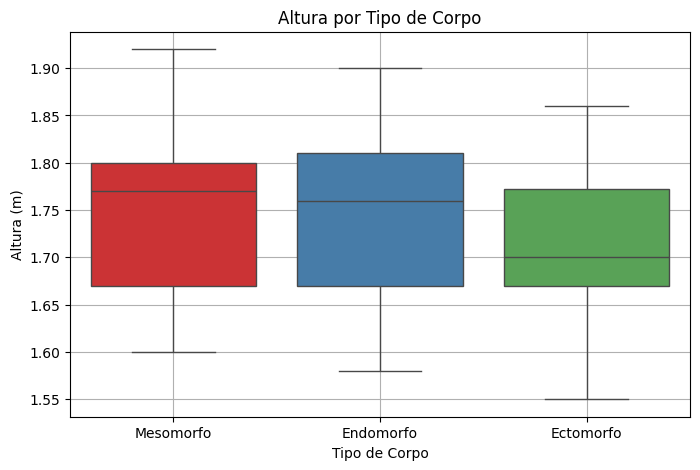

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataframe['Tipo de Corpo'], y=dataframe['Altura'], palette='Set1')
plt.title('Altura por Tipo de Corpo')
plt.xlabel('Tipo de Corpo')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

### Analise dos dados
- O IMC tem muita relacao sobre a altura e peso.
- Conseguimos analise que pessoas que nao tem rotina de Treino tem a tendencia de ter um IMC maior
- O Sexo feminino tem tendencias maiores em Ectomorfo do que Sexo Masculino
- Mesomorfo e o tipo de corpo mais comum entre as pessoas
- Pessoas Endomorfas tem a tendencia de ter um indice de IMC maior
#### Conclusao
- O conjunto de dados e feito por dados gerados por IA ou aleatorios, existe um padrao, mas nao ha significado exato ou pesos corretos.
- Nesta ultima versao do dataset conseguimos criar dados com a minima coerencia e simulando um pouco o mundo real.
- Conjunto de dados muito pequeno para um treinamento real

# Tratamento dos dados

In [28]:
dataframe.dtypes

Nome              object
Idade              int64
Sexo              object
Treina              bool
Altura           float64
Peso               int64
Tipo de Corpo     object
Deficiente          bool
imc              float64
sobrepeso           bool
dtype: object

Para o treinamento e necessario transformar as variaveis categorias em numericas

In [29]:
dataframe['Sexo'] = dataframe['Sexo'].replace({'F': 0, 'M': 1})
dataframe['Treina'] = dataframe['Treina'].astype(int)
dataframe['Deficiente'] = dataframe['Deficiente'].astype(int)
dataframe['Tipo de Corpo'] = dataframe['Tipo de Corpo'].map({'Mesomorfo': 0, 'Ectomorfo': 1, 'Endomorfo': 2})


In [30]:
dataframe.tail()

,Nome,Idade,Sexo,Treina,Altura,Peso,Tipo de Corpo,Deficiente,imc,sobrepeso
379,Otávio,42,1,1,1.81,79,0,0,24.114038,False
380,Paula,21,0,1,1.66,58,1,0,21.048048,False
381,Ricardo,36,1,0,1.79,76,2,1,23.719609,False
382,Sofia,24,0,1,1.70,62,0,0,21.453287,False
383,Tiago,29,1,1,1.83,81,2,0,24.187046,False


Tirando nome do conjunto de dados

In [31]:
# Removendo a coluna 'Nome'
df_sn = dataframe.drop(columns=['Nome'], inplace=True)

Utilizando o plt Heatmap para verificar a relacao entre os dados

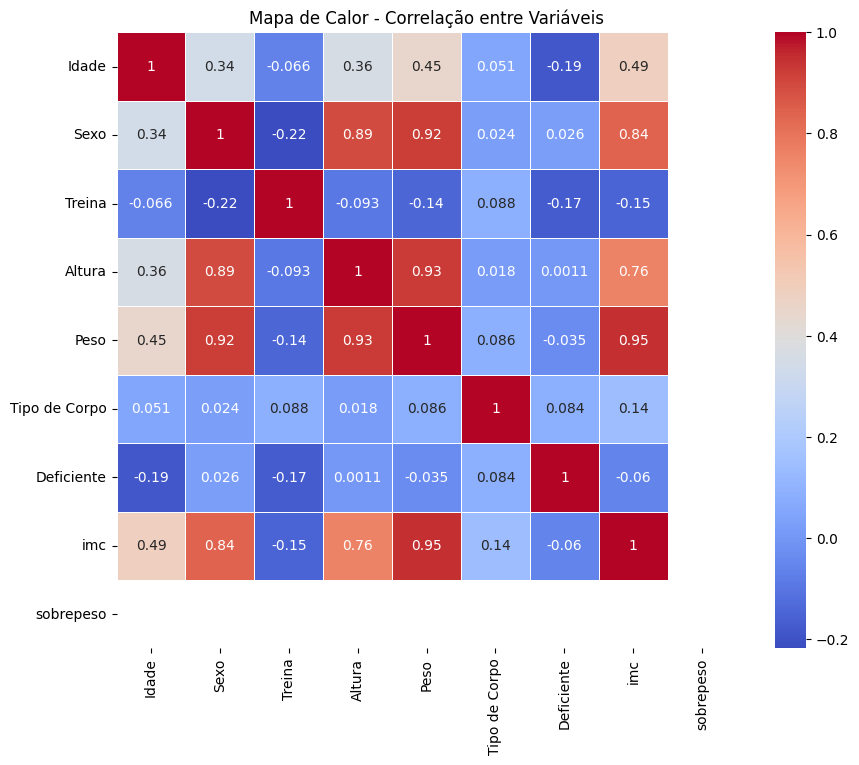

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor - Correlação entre Variáveis')
plt.show()

Depois de uma analise sobre o objetivo final e o conjunto de dados, foi decidido criar uma variavel alvo com 5 valores possiveis

In [33]:
dataframe['Objetivo de Treino'] = 'Treino Manutencao'

dataframe['Objetivo de Treino'] = np.where(dataframe['Deficiente'] == 1, 'Treino Especial', dataframe['Objetivo de Treino'])

# Definir Treino Perda de Peso para clientes com sobrepeso
dataframe['Objetivo de Treino'] = np.where(dataframe['sobrepeso'] == 1, 'Treino Perda de Peso', dataframe['Objetivo de Treino'])

# Definir Treino Ganho de Massa para clientes com IMC < 18.5
dataframe['Objetivo de Treino'] = np.where(dataframe['imc'] < 18.5, 'Treino Ganho de Massa', dataframe['Objetivo de Treino'])

# Definir Treino de Força para clientes com IMC entre 18.5 e 24.9
dataframe['Objetivo de Treino'] = np.where((dataframe['imc'] >= 18.5) & (dataframe['imc'] <= 24.9) & (dataframe['Deficiente'] == 0), 'Treino de Forca', dataframe['Objetivo de Treino'])

In [34]:
dataframe.tail()

,Idade,Sexo,Treina,Altura,Peso,Tipo de Corpo,Deficiente,imc,sobrepeso,Objetivo de Treino
379,42,1,1,1.81,79,0,0,24.114038,False,Treino de Forca
380,21,0,1,1.66,58,1,0,21.048048,False,Treino de Forca
381,36,1,0,1.79,76,2,1,23.719609,False,Treino Especial
382,24,0,1,1.70,62,0,0,21.453287,False,Treino de Forca
383,29,1,1,1.83,81,2,0,24.187046,False,Treino de Forca


# Treinamento do Modelo

Definindo Variavel alvo do modelo

In [35]:
X = dataframe[['Idade', 'Sexo', 'Treina', 'Altura', 'Peso', 'Tipo de Corpo', 'Deficiente', 'imc', 'sobrepeso']]
y = dataframe['Objetivo de Treino']

In [36]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Instanciar e treinar o modelo
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
# Fazer previsões
y_pred_dt = model_dt.predict(X_test)

In [39]:
# Avaliar precisão
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Acurácia Decision Tree Classifier: {accuracy_dt:.2f}')

Acurácia Decision Tree Classifier: 1.00


In [40]:
# Exibir relatório de classificação
print(classification_report(y_test, y_pred_dt))

                   precision    recall  f1-score   support

  Treino Especial       1.00      1.00      1.00         5
Treino Manutencao       1.00      1.00      1.00        29
  Treino de Forca       1.00      1.00      1.00        43

         accuracy                           1.00        77
        macro avg       1.00      1.00      1.00        77
     weighted avg       1.00      1.00      1.00        77



#### Random Forest

In [41]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = model_rf.predict(X_test)

In [42]:
# Avaliar precisão
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia Random Forest Classifier: {accuracy_rf:.2f}')

Acurácia Random Forest Classifier: 1.00


In [43]:
# Exibir relatório de classificação
print(classification_report(y_test, y_pred_rf))

                   precision    recall  f1-score   support

  Treino Especial       1.00      1.00      1.00         5
Treino Manutencao       1.00      1.00      1.00        29
  Treino de Forca       1.00      1.00      1.00        43

         accuracy                           1.00        77
        macro avg       1.00      1.00      1.00        77
     weighted avg       1.00      1.00      1.00        77



In [44]:
y_test

268    Treino Manutencao
250    Treino Manutencao
355      Treino de Forca
332      Treino de Forca
56     Treino Manutencao
             ...        
104    Treino Manutencao
167    Treino Manutencao
63       Treino de Forca
233    Treino Manutencao
84     Treino Manutencao
Name: Objetivo de Treino, Length: 77, dtype: object

In [45]:
y_pred_rf

array(['Treino Manutencao', 'Treino Manutencao', 'Treino de Forca',
       'Treino de Forca', 'Treino Manutencao', 'Treino de Forca',
       'Treino de Forca', 'Treino Manutencao', 'Treino Especial',
       'Treino de Forca', 'Treino de Forca', 'Treino de Forca',
       'Treino Manutencao', 'Treino de Forca', 'Treino Manutencao',
       'Treino Manutencao', 'Treino Manutencao', 'Treino Especial',
       'Treino de Forca', 'Treino de Forca', 'Treino Manutencao',
       'Treino de Forca', 'Treino de Forca', 'Treino de Forca',
       'Treino de Forca', 'Treino de Forca', 'Treino de Forca',
       'Treino Especial', 'Treino de Forca', 'Treino Manutencao',
       'Treino de Forca', 'Treino Manutencao', 'Treino de Forca',
       'Treino Manutencao', 'Treino de Forca', 'Treino de Forca',
       'Treino Manutencao', 'Treino de Forca', 'Treino Manutencao',
       'Treino Manutencao', 'Treino de Forca', 'Treino de Forca',
       'Treino Manutencao', 'Treino Manutencao', 'Treino de Forca',
      

Primeira Tentativa de mapping

In [46]:
# # Mapear os valores numéricos para suas categorias originais
# class_mapping = {0: 'Treino Especial', 1: 'Treino Manutenção', 2: 'Treino de Forca'}
# y_test_mapped = y_test.reset_index(drop=True).map(class_mapping)
# y_pred_mapped = pd.Series(y_pred_rf).map(class_mapping)

# # Criar DataFrame com resultados mapeados
# results_df = pd.DataFrame({'Real': y_test_mapped, 'Previsão': y_pred_mapped})

#### SVM

In [48]:
# Pipeline com pré-processamento e modelo SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', random_state=42))
])

# Treinar o modelo
pipeline_svm.fit(X_train, y_train)

# Fazer previsões
y_pred_svm = pipeline_svm.predict(X_test)


In [49]:
# Avaliar precisão
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Acurácia SVM Classifier: {accuracy_svm:.2f}')

Acurácia SVM Classifier: 0.97


In [50]:
#Exibir relatório de classificação
print(classification_report(y_test, y_pred_svm))

                   precision    recall  f1-score   support

  Treino Especial       1.00      1.00      1.00         5
Treino Manutencao       1.00      0.93      0.96        29
  Treino de Forca       0.96      1.00      0.98        43

         accuracy                           0.97        77
        macro avg       0.99      0.98      0.98        77
     weighted avg       0.98      0.97      0.97        77



### NEURAL NETWORK W KERAS

In [51]:
# Codificar variável alvo
encoder = LabelEncoder()
y = encoder.fit_transform(dataframe['Objetivo de Treino'])

In [52]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Construir o modelo
model_nn = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

In [55]:
# Compilar o modelo
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Treinando o modelo nesta sua versao com 100 epocas

In [56]:
# Treinar o modelo
history = model_nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

In [57]:
# Avaliar o modelo
loss, accuracy_nn = model_nn.evaluate(X_test, y_test, verbose=0)
print(f'Acurácia Neural Network (Keras): {accuracy_nn:.2f}')

Acurácia Neural Network (Keras): 0.97


In [58]:
# Exibir relatório de classificação
y_pred_nn = model_nn.predict(X_test)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)
print(classification_report(y_test, y_pred_nn_classes, target_names=encoder.classes_))

3/3 [==============================] - 0s 5ms/step
                   precision    recall  f1-score   support

  Treino Especial       1.00      1.00      1.00         5
Treino Manutencao       0.97      0.97      0.97        29
  Treino de Forca       0.98      0.98      0.98        43

         accuracy                           0.97        77
        macro avg       0.98      0.98      0.98        77
     weighted avg       0.97      0.97      0.97        77



# Teste do Modelo com novos dados e simulacao

In [59]:
dataframe.head()

,Idade,Sexo,Treina,Altura,Peso,Tipo de Corpo,Deficiente,imc,sobrepeso,Objetivo de Treino
0,28,0,1,1.65,55,0,0,20.202020,False,Treino de Forca
1,35,1,1,1.80,85,2,0,26.234568,False,Treino Manutencao
2,22,0,1,1.70,60,1,1,20.761246,False,Treino Especial
3,30,1,0,1.75,70,0,0,22.857143,False,Treino de Forca
4,40,0,1,1.60,70,2,0,27.343750,False,Treino Manutencao


##### Criando novos dados para testar o modelo e simular o uso da API com o GPT

In [60]:
novos_dados = {
    'Idade': [30,25,40],
    'Sexo': [1,0,1],
    'Treina': [1,0,0],
    'Altura': [1.75,1.60,1.65],
    'Peso': [65,80,77],
    'Tipo de Corpo': [0,2,1],
    'Deficiente': [0,0,1]
}

df_novos_dados = pd.DataFrame(novos_dados)

In [61]:
df_novos_dados

,Idade,Sexo,Treina,Altura,Peso,Tipo de Corpo,Deficiente
0,30,1,1,1.75,65,0,0
1,25,0,0,1.60,80,2,0
2,40,1,0,1.65,77,1,1


Calculando o IMC e definindo sobrepeso

In [62]:
df_novos_dados['imc'] = df_novos_dados['Peso'] / (df_novos_dados['Altura'] ** 2)

df_novos_dados['sobrepeso'] = df_novos_dados['imc'] > 30
df_novos_dados['sobrepeso'] = df_novos_dados['sobrepeso'] #Posso passar um map para mudar o valor padrao booleano, mas vou deixar True e False

Criacao de Target

In [63]:
df_novos_dados['Objetivo de Treino'] = 'Treino Manutencao'

df_novos_dados['Objetivo de Treino'] = np.where(df_novos_dados['Deficiente'] == 1, 'Treino Especial', df_novos_dados['Objetivo de Treino'])

# Definir Treino Perda de Peso para clientes com sobrepeso
df_novos_dados['Objetivo de Treino'] = np.where(df_novos_dados['sobrepeso'] == 1, 'Treino Perda de Peso', df_novos_dados['Objetivo de Treino'])

# Definir Treino Ganho de Massa para clientes com IMC < 18.5
df_novos_dados['Objetivo de Treino'] = np.where(df_novos_dados['imc'] < 18.5, 'Treino Ganho de Massa', df_novos_dados['Objetivo de Treino'])

# Definir Treino de Força para clientes com IMC entre 18.5 e 24.9
df_novos_dados['Objetivo de Treino'] = np.where((df_novos_dados['imc'] >= 18.5) & (df_novos_dados['imc'] <= 24.9) & (df_novos_dados['Deficiente'] == 0), 'Treino de Forca', df_novos_dados['Objetivo de Treino'])

In [64]:
df_novos_dados

,Idade,Sexo,Treina,Altura,Peso,Tipo de Corpo,Deficiente,imc,sobrepeso,Objetivo de Treino
0,30,1,1,1.75,65,0,0,21.224490,False,Treino de Forca
1,25,0,0,1.60,80,2,0,31.250000,True,Treino Perda de Peso
2,40,1,0,1.65,77,1,1,28.282828,False,Treino Especial


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
df_novos_dados = df_novos_dados[X_train.columns] # alinhando as colunas dos novos valores

RandomForestClassifier escolhido porque e o modelo menor. nao ha necessidade de utilizar modelos maiores ou desenvolvidos para a quantidade de dados

In [76]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Fazer previsões usando os valores novos
y_pred_novos = model_rf.predict(df_novos_dados)

In [80]:
# Mapear os valores numéricos para suas categorias originais
class_mapping = {0: 'Treino Especial', 1: 'Treino Perda de Peso', 2: 'Treino de Forca'}
y_pred_novos_mapped = pd.Series(y_pred_novos).map(class_mapping)

In [83]:
y_pred_novos_mapped # Ver o predict do modelo

0         Treino de Forca
1    Treino Perda de Peso
2         Treino Especial
dtype: object

In [107]:
# Geração da mensagem de saída
output_messages = []
for pred in y_pred_novos_mapped: # Somente essas 3 classificacoes estao mapeadas por enquanto.
    if pred == 'Treino de Forca':
        output_message = "Crie um plano de treino de força de 4 semanas para um indivíduo saudável que treina regularmente"   #Input Para o GPT
    elif pred == 'Treino Perda de Peso':
        output_message = "Desenvolva um programa de exercícios de 6 semanas focado na perda de peso com um estilo de vida sedentário"
    elif pred == 'Treino Especial':
        output_message = "Elabore um plano de treino seguro e eficaz de 8 semanas para uma pessoa com deficiência nas pernas que deseja melhorar a força do tronco e dos braços"
    output_messages.append(output_message) # Salva

## API COM O GPT

In [108]:
# Integração com o ChatGPT
def enviar_para_chatgpt(message):
    url = 'https://api.openai.com/v1/chat/completions'
    headers = {
        'Content-Type': 'application/json',
        'Authorization': 'Bearer ChaveAPIAQUI'  # Substitua ChaveAPIAQUI pela API Key do OpenAI
    }
    data = {
        'model': 'gpt-3.5-turbo',  # modelo escolhido
        'messages': [
            {'role': 'user', 'content': message}
        ]
    }
    response = requests.post(url, headers=headers, json=data)
    if response.status_code == 200:
        return response.json()['choices'][0]['message']['content']
    elif response.status_code == 429:
        return "Erro 429 - Excedeu o limite de solicitações."
    else:
        return f"Erro ao enviar mensagem para o ChatGPT: {response.status_code}"


In [109]:
# Enviar mensagens para o ChatGPT e obter respostas
for message in output_messages:
    input_message = f"Classificação: {message}"
    response = enviar_para_chatgpt(input_message)
    print(f"Input: {input_message}")
    if "Erro" in response:
        print(f"Erro ao enviar mensagem para o ChatGPT: {response}")
    else:
        print(f"Output: {response}")
    print("\n")
    time.sleep(2)  # Aguarda 2 segundos entre cada solicitação para evitar erro de limite de solicitacao

Input: Classificação: Crie um plano de treino de força de 4 semanas para um indivíduo saudável que treina regularmente
Output: Sem conhecer os objetivos específicos do indivíduo, como ganho de massa muscular, aumento de força, definição muscular ou resistência, é difícil criar um plano de treino de força personalizado. No entanto, irei apresentar um exemplo genérico de um plano de treino de força de 4 semanas para um indivíduo saudável que treina regularmente:

Semana 1:
- Dia 1: Agachamento com barra - 4 séries de 10 repetições
           Supino reto - 4 séries de 10 repetições
           Barra fixa - 3 séries de 10 repetições
- Dia 2: Descanso ou cardio leve (caminhada, bicicleta, etc.)
- Dia 3: Levantamento terra - 4 séries de 8 repetições
           Desenvolvimento com halteres - 4 séries de 10 repetições
           Remada curvada com barra - 3 séries de 12 repetições
- Dia 4: Descanso ou cardio leve
- Dia 5: Afundo com halteres - 3 séries de 12 repetições por perna
           Elev